# Betting markets - chart individual seat probabilities

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data" data-toc-modified-id="Get-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Plot-seats" data-toc-modified-id="Plot-seats-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot seats</a></span></li><li><span><a href="#Plot-probabilities" data-toc-modified-id="Plot-probabilities-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot probabilities</a></span><ul class="toc-item"><li><span><a href="#Type-of-Parliament" data-toc-modified-id="Type-of-Parliament-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Type of Parliament</a></span></li><li><span><a href="#Election-winner" data-toc-modified-id="Election-winner-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Election winner</a></span></li></ul></li></ul></div>

## Python set-up

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.units as munits
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

import common

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter
plt.style.use('./markgraph.mplstyle')

/Users/bryanpalmer/miniforge3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Get data

In [2]:
FILE = '../historical-data/sportsbet-2022-individual-seats.csv'
df = pd.read_csv(FILE, na_values = 'SUS', parse_dates=['datetime'])
df = df[df['value'].notna()] # ignore missing values
len(df)

1844

In [3]:
df.columns

Index(['datetime', 'seat', 'variable', 'value'], dtype='object')

## Plot seats

In [4]:
def colourise(s:str) -> str:
    colors = {
        'coalition': 'royalblue',
        'labor':     '#cc0000',
        'green':     'darkgreen',
        'independent': 'darkorange',
    }
    for party in colors.keys():
        if party in s.lower():
            return colors[party]
    return 'hotpink'

def plot_seat(df:pd.DataFrame, seat:str) -> float:

    # get seat probabilities
    IGNORE_ABOVE = 25 # dollars - minimise impacy of the longshot bias
    seat_probs = (
        df[df.seat == seat]
        .pivot(index='datetime', columns='variable', values='value')
        .sort_index(ascending=True)
        .pipe(lambda x: x.where(x <= IGNORE_ABOVE, other=np.nan))
        .dropna(how='all', axis=1)
        .pipe(lambda x: 1 / x)
        .pipe(lambda x: x.div(other=x.sum(axis=1), axis=0))
    ) * 100 # per cent
    
    latest_best = seat_probs.iloc[-1].max()

    # plot
    markers = ['x', '+', 'D', 'o', 's', '^', 'v', ]
    fig, ax = plt.subplots()
    size = 9
    for i, column in enumerate(seat_probs.columns):
        c = colourise(column)
        m = markers[i]
        ax.plot(seat_probs.index, seat_probs[column], 
                markersize=size,
                lw=2, color=c, marker=m, label=column)
        size -= 1
    ax.axhline(50, color='#999999', lw=0.5)
    ax.legend(loc='center left', prop={'size': 10})
    title = f'Sportsbet seat win probabilities over time - {seat}'
    common.plot_finalise(ax, title=title, ylabel='Implied Win Probability (%)')
    
    return latest_best

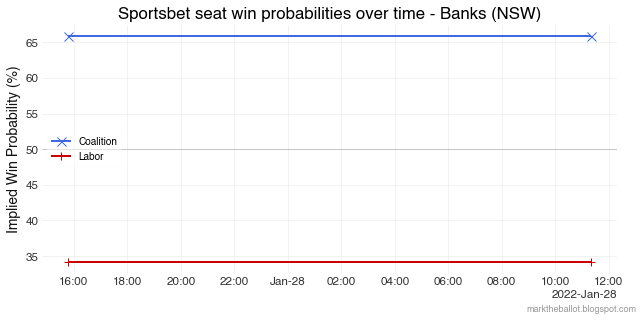

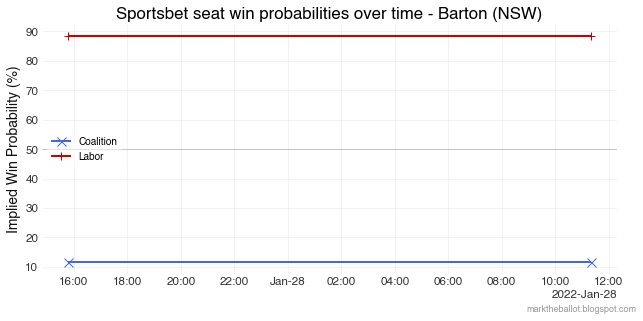

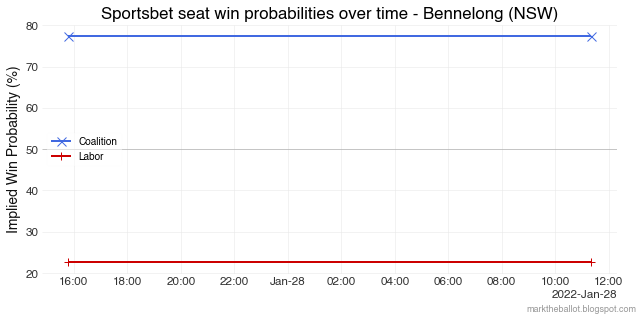

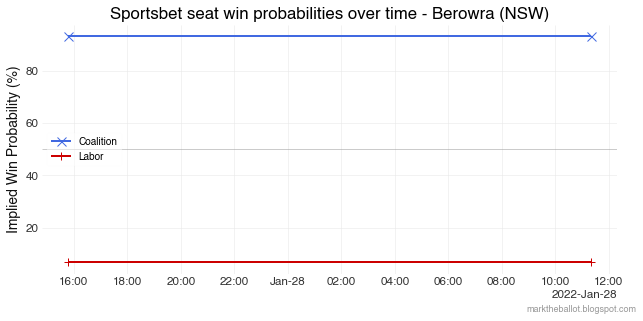

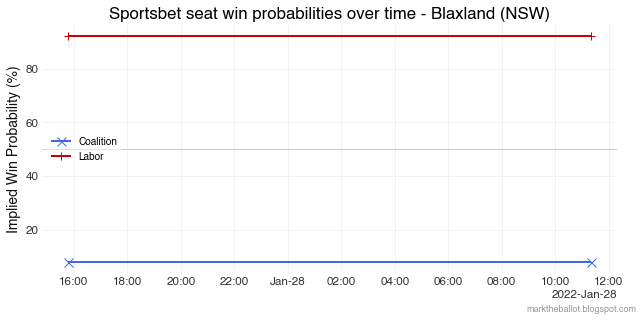

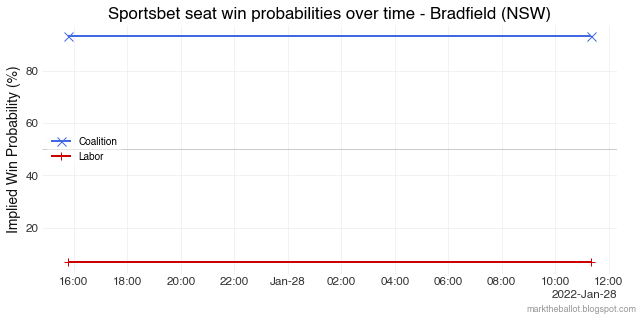

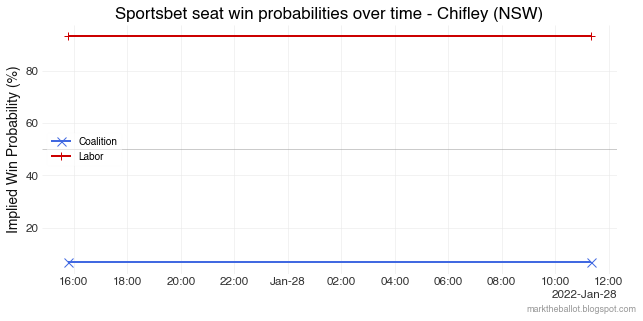

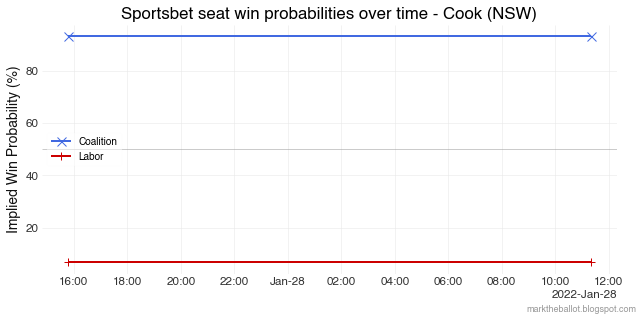

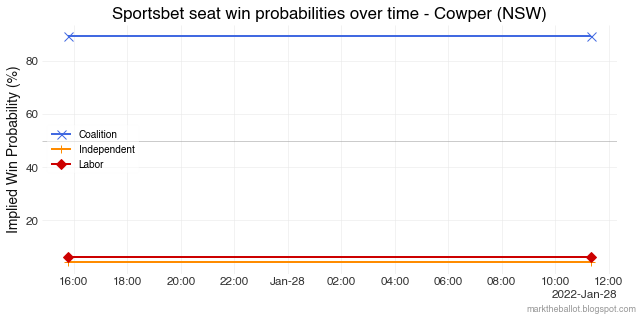

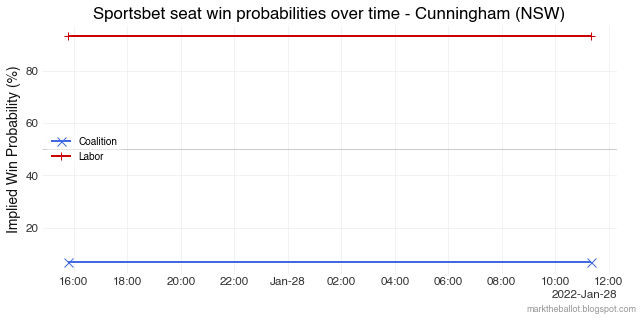

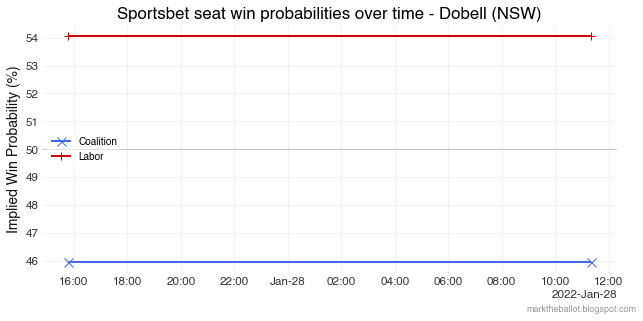

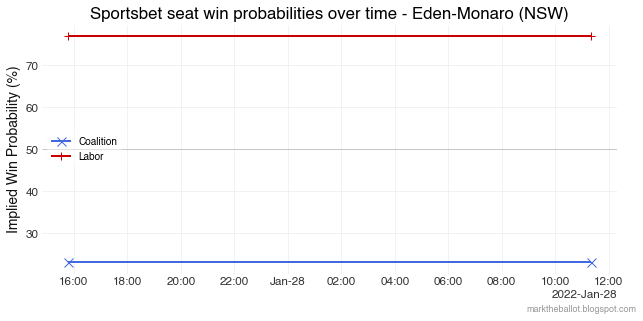

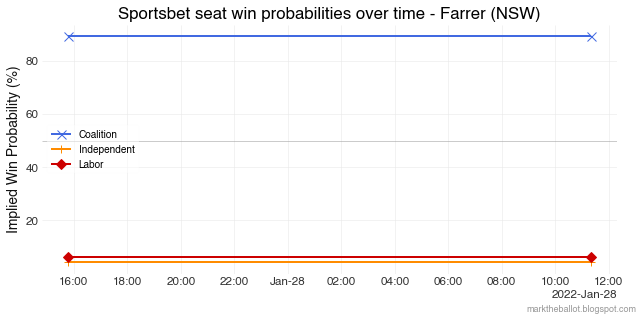

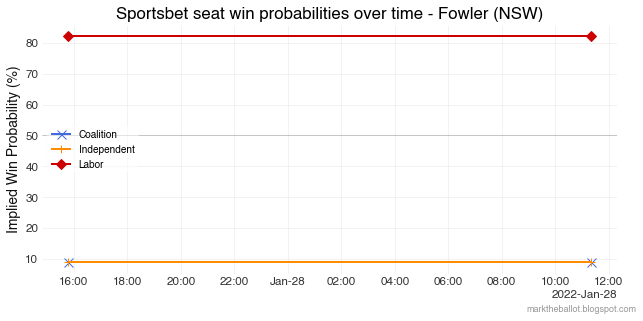

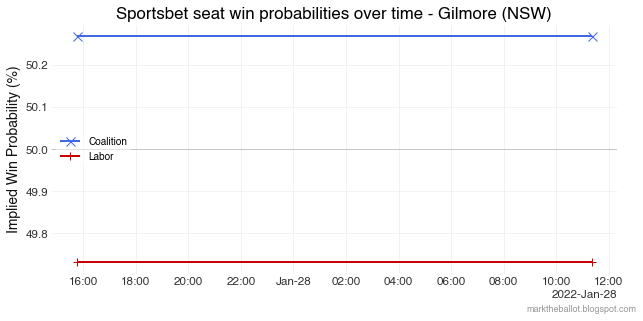

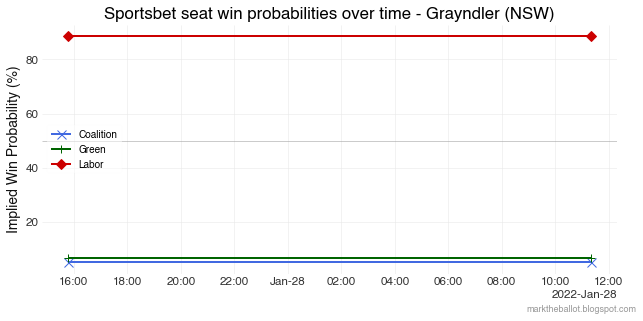

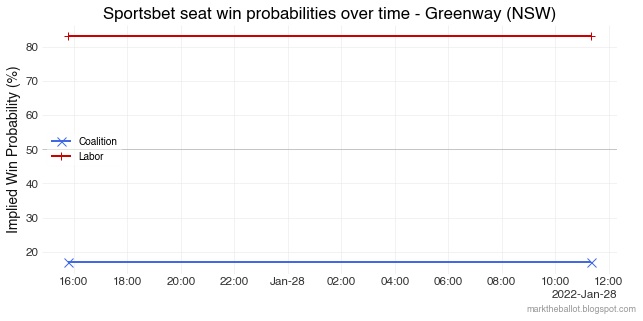

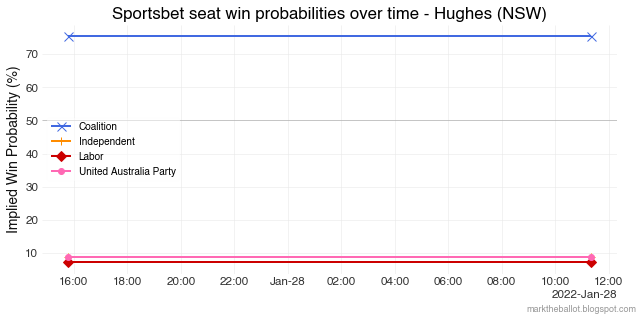

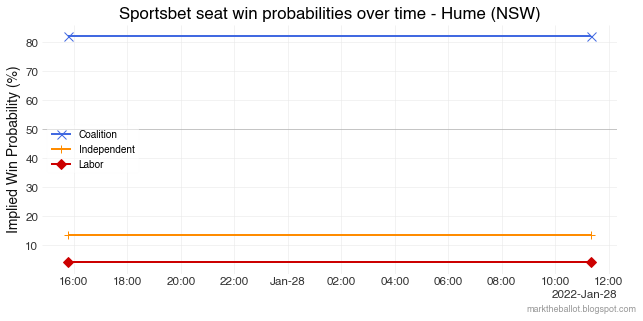

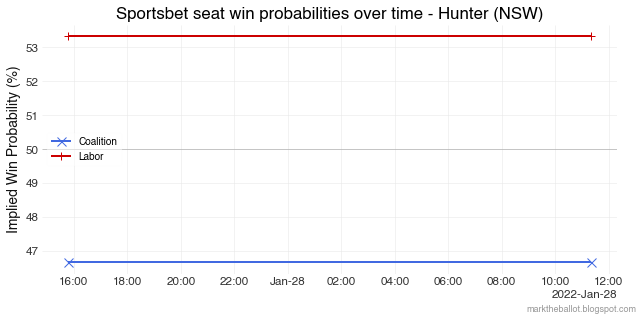

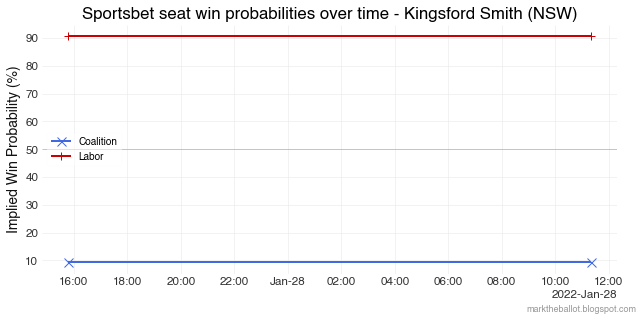

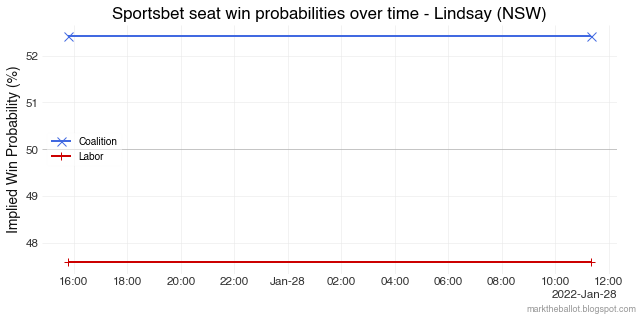

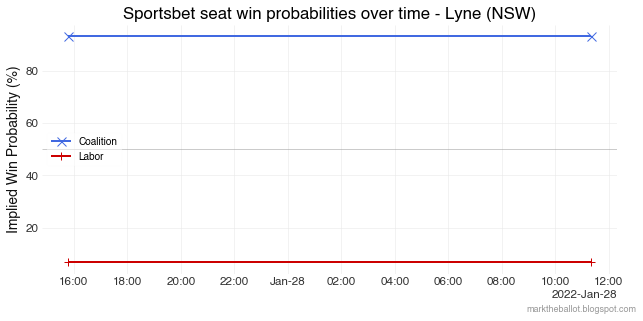

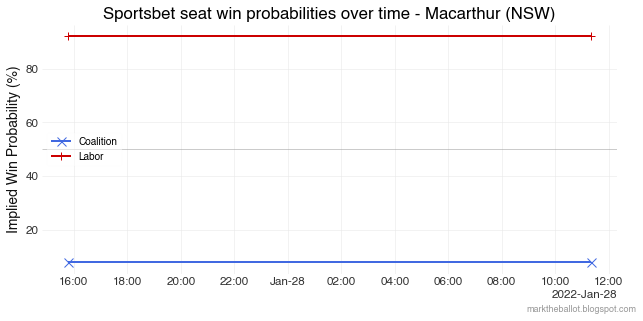

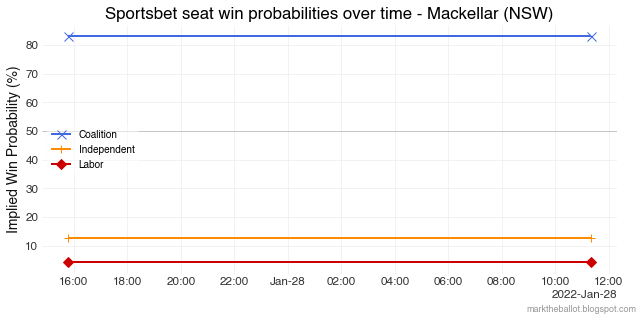

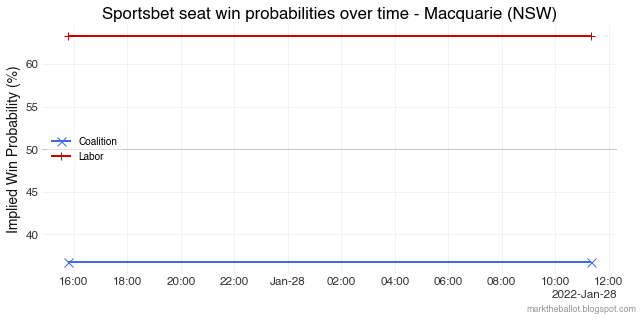

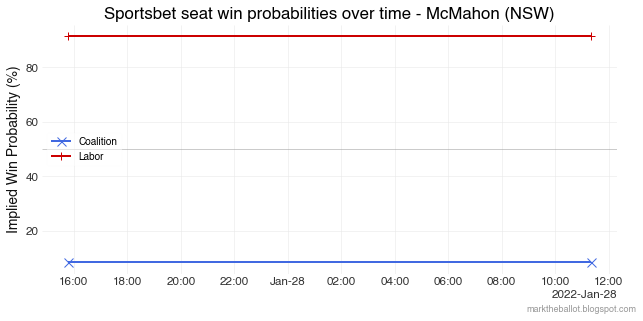

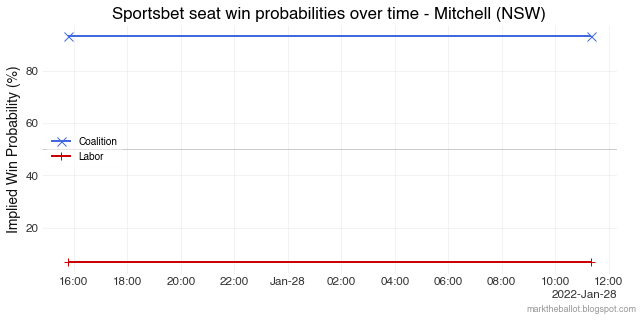

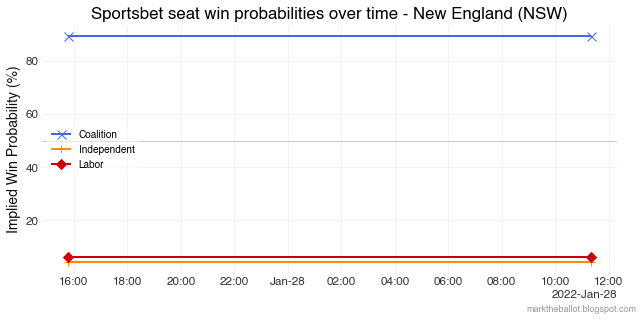

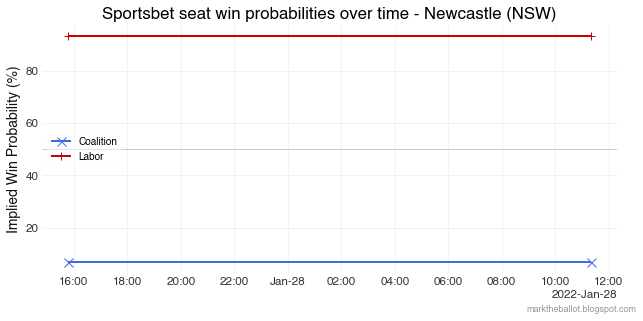

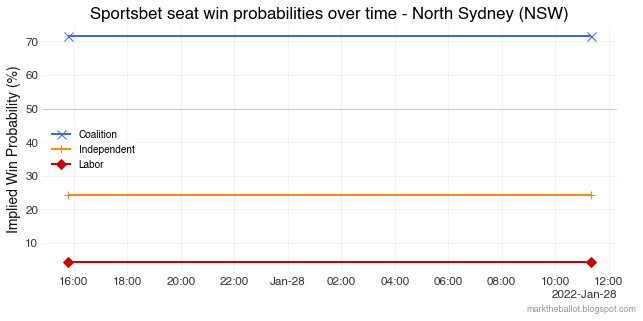

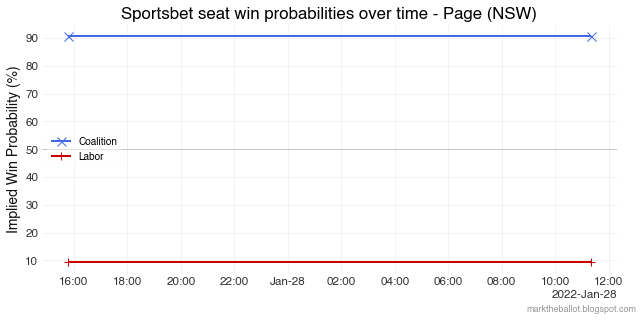

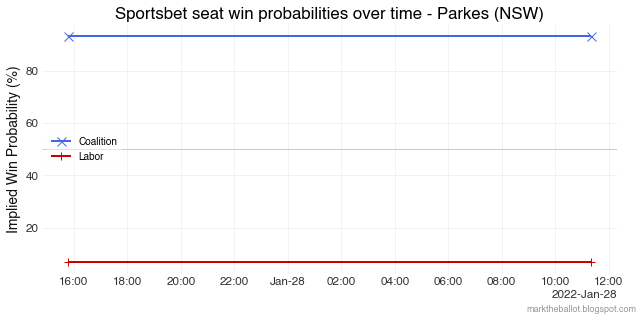

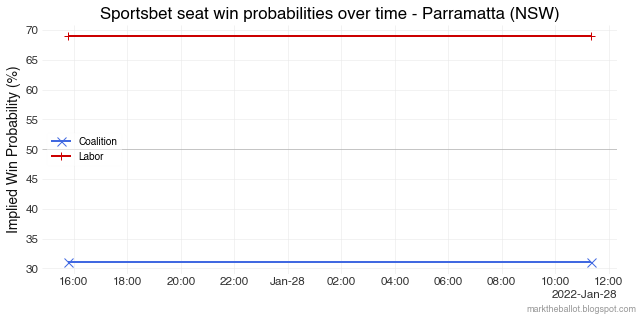

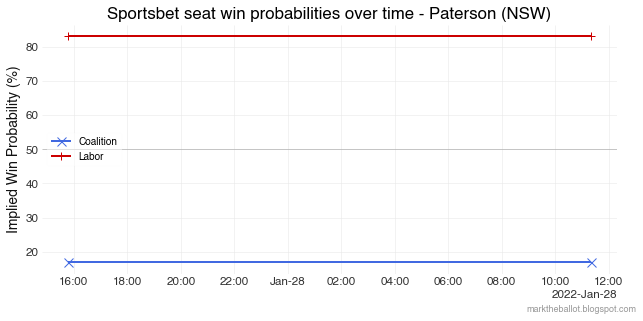

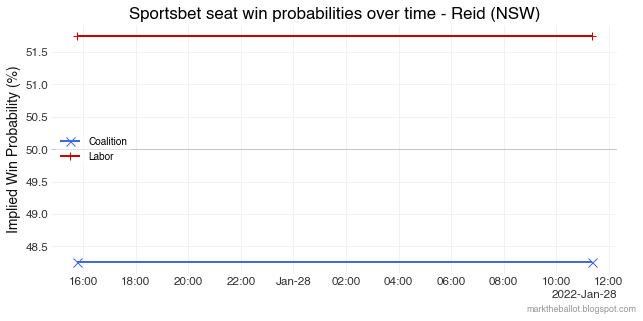

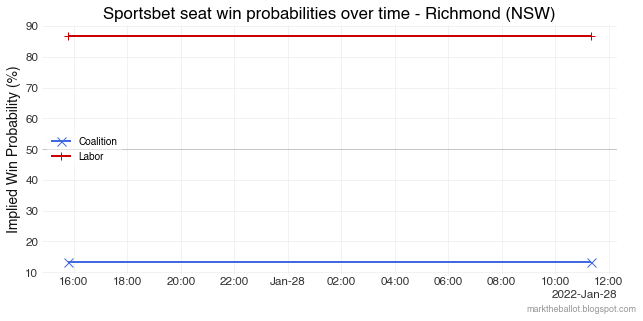

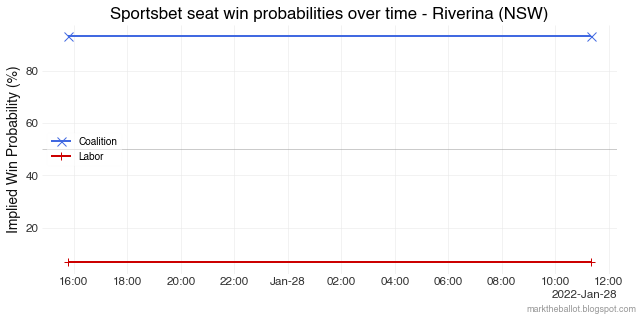

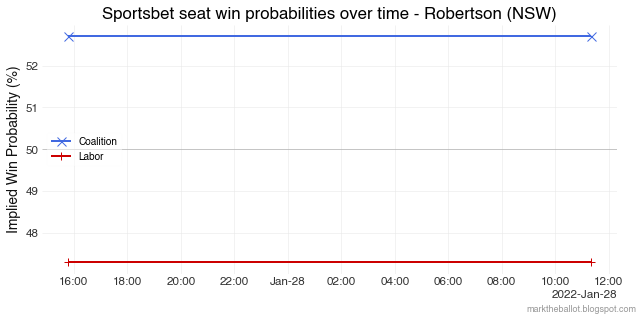

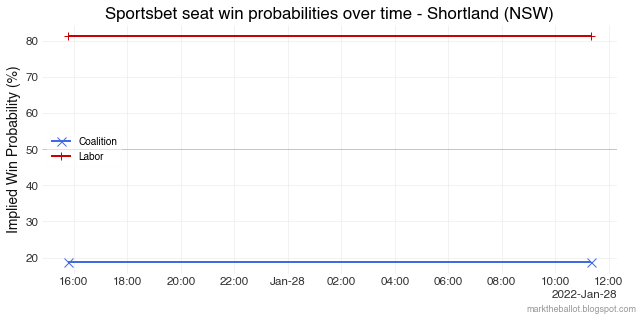

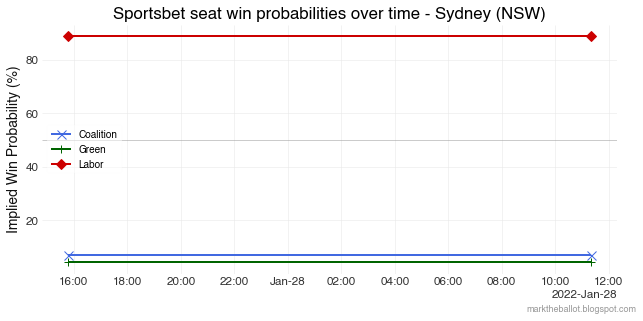

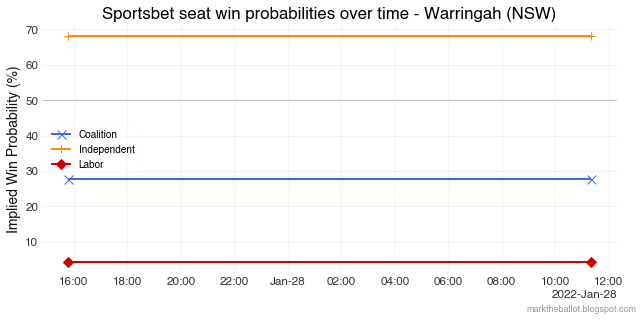

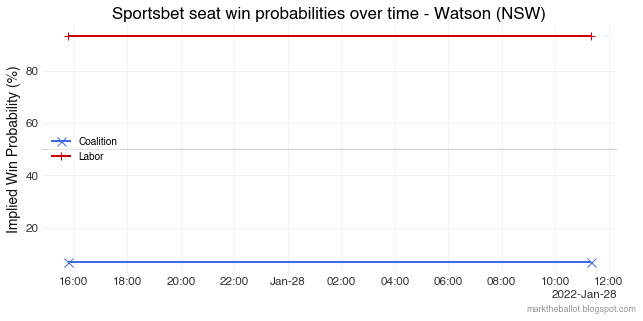

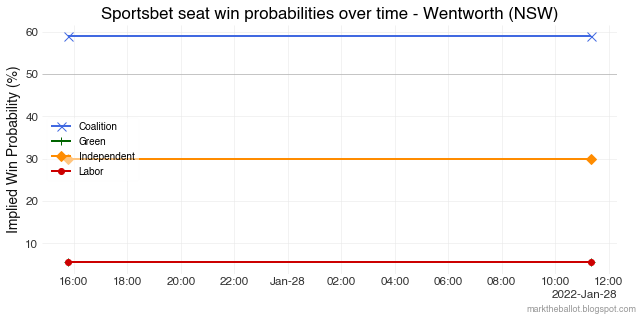

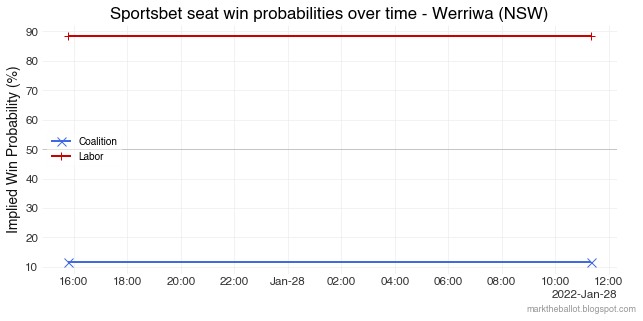

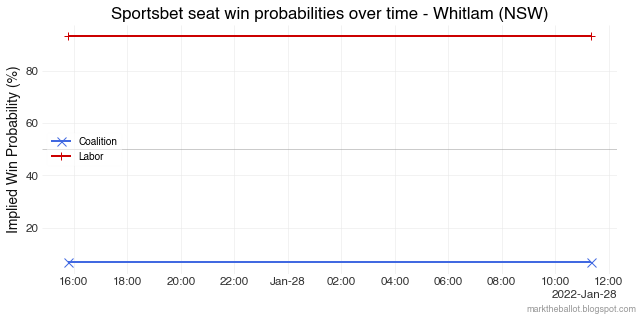

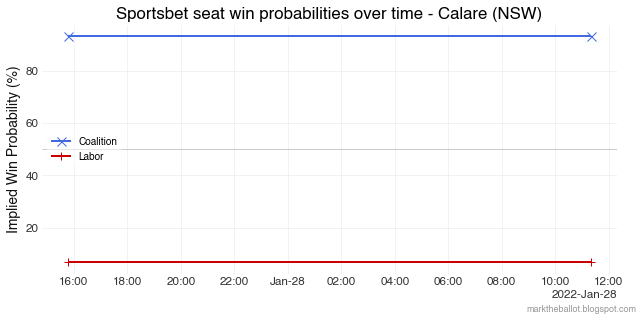

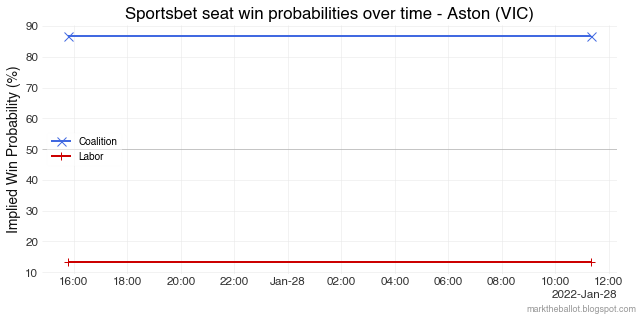

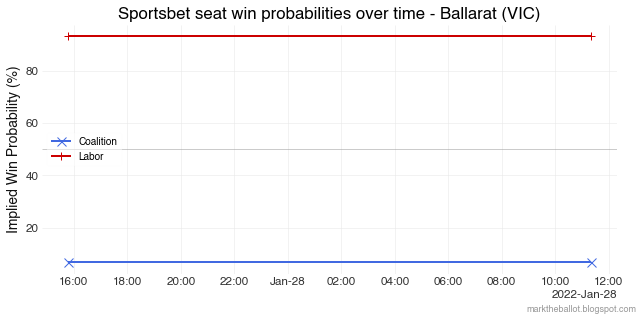

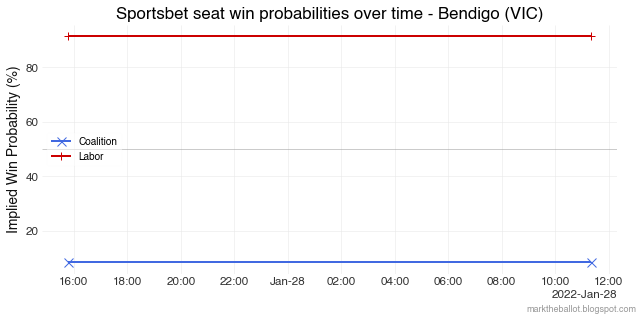

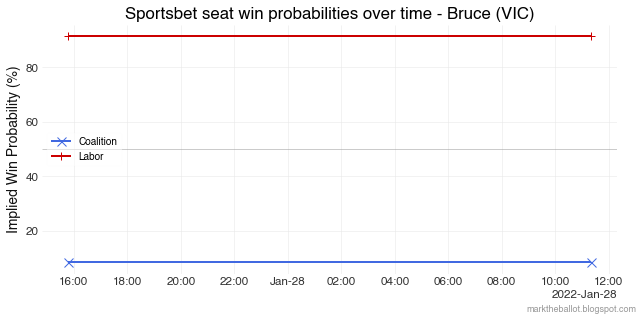

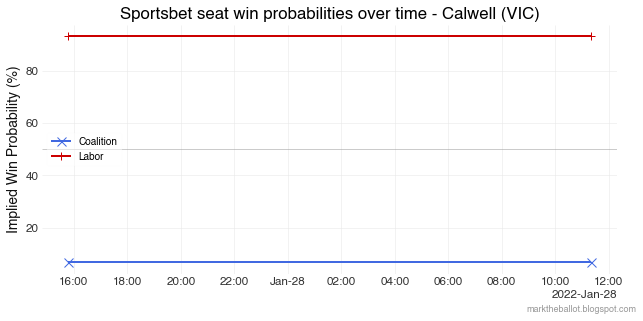

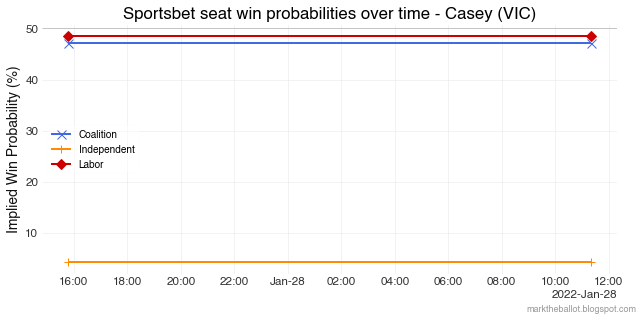

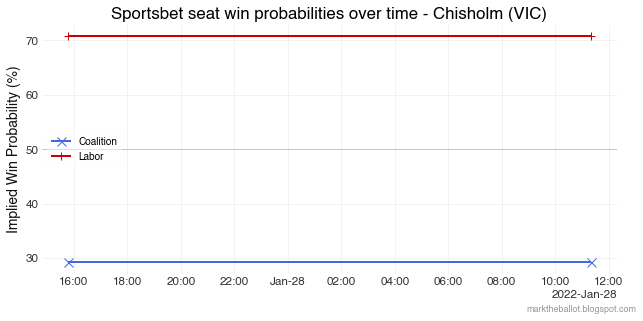

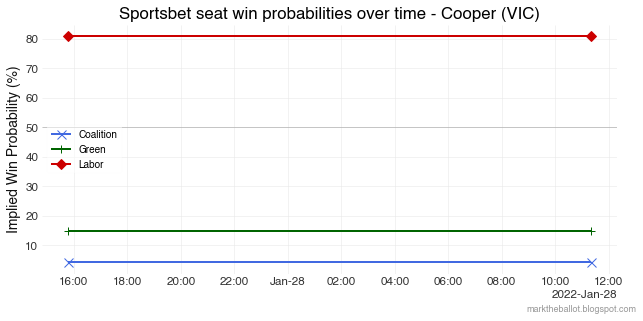

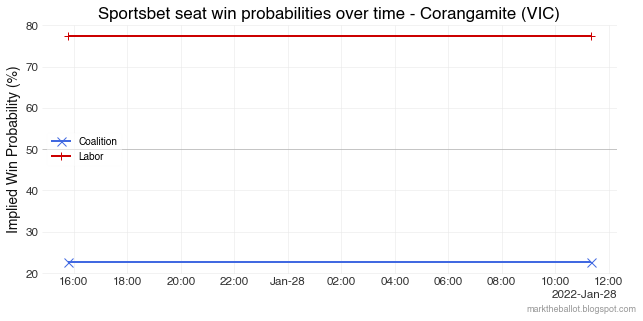

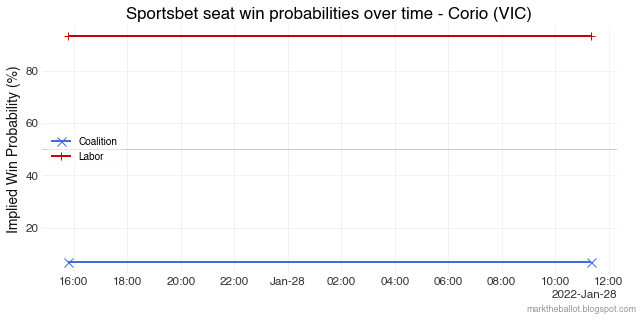

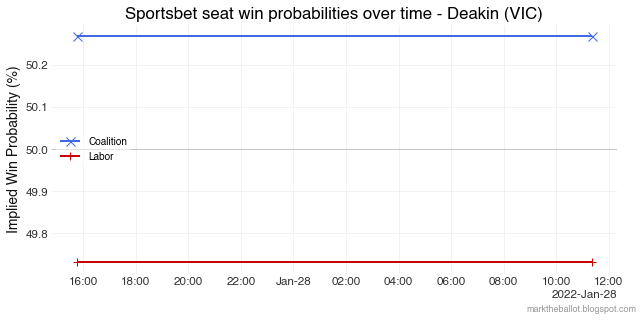

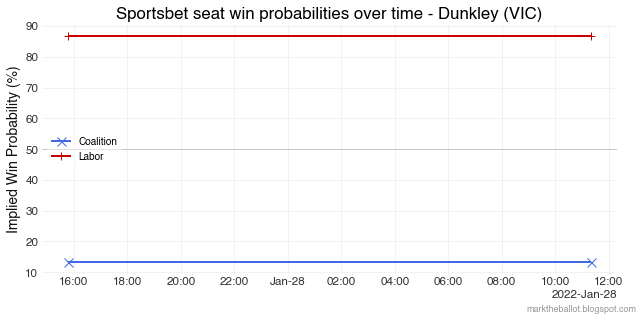

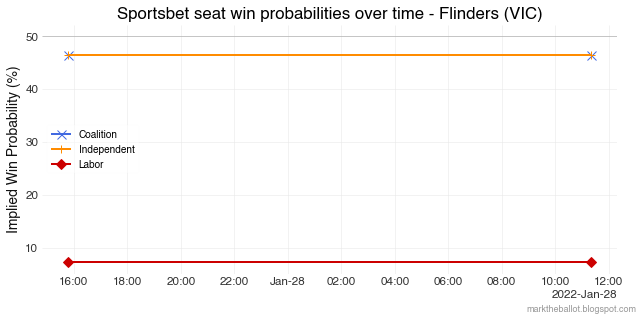

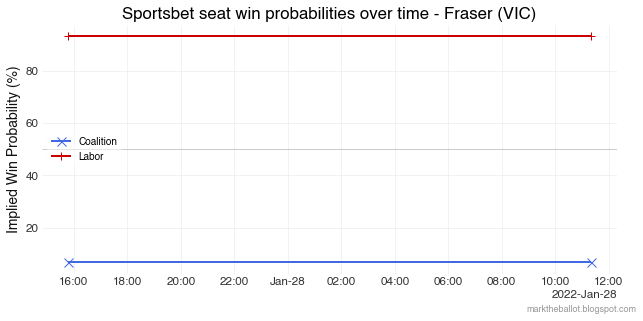

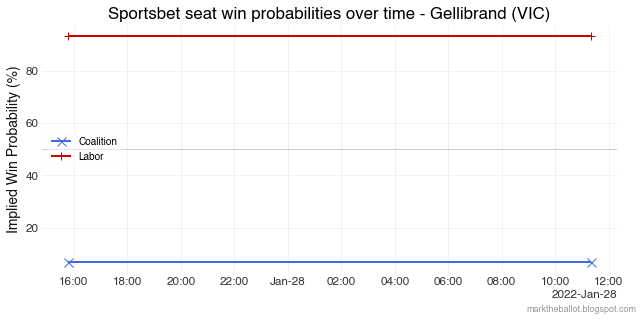

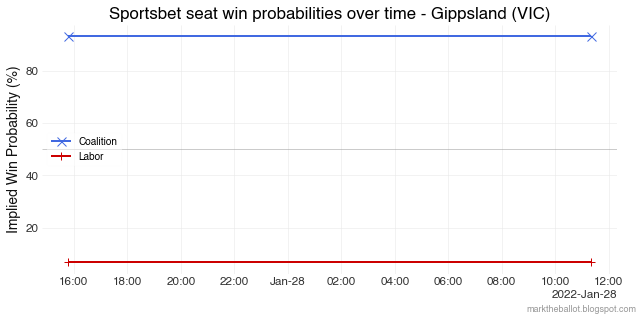

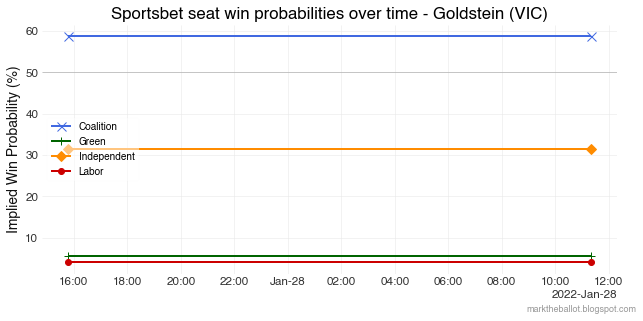

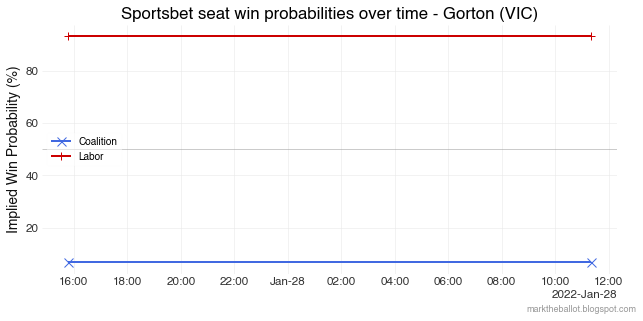

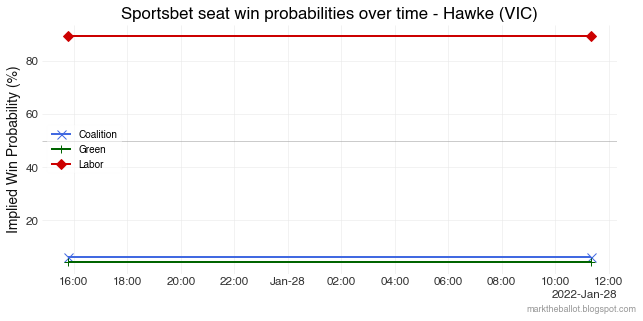

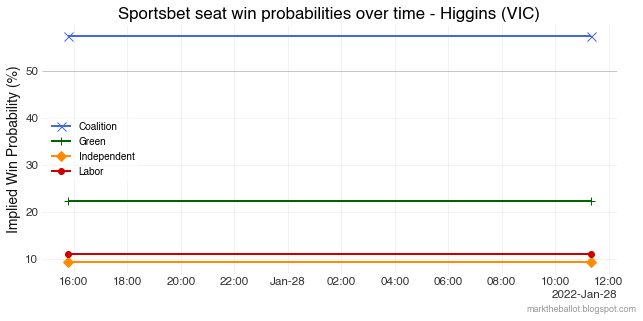

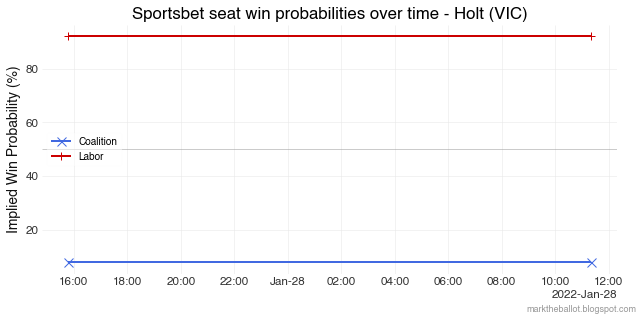

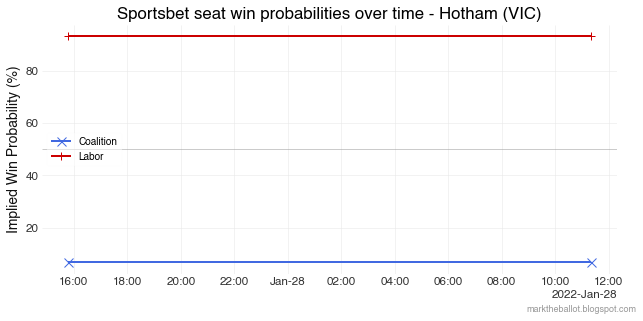

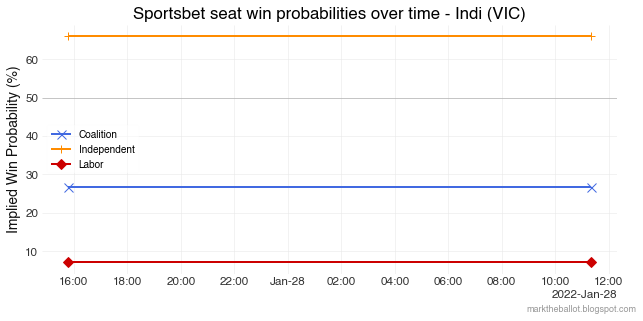

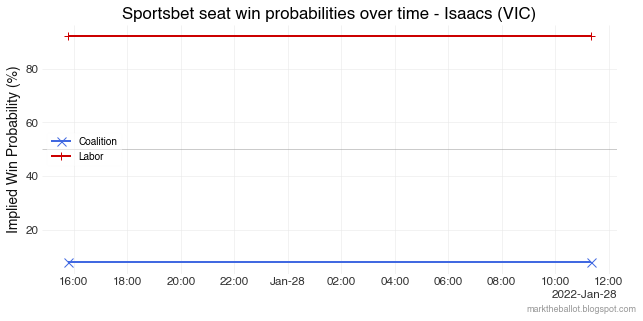

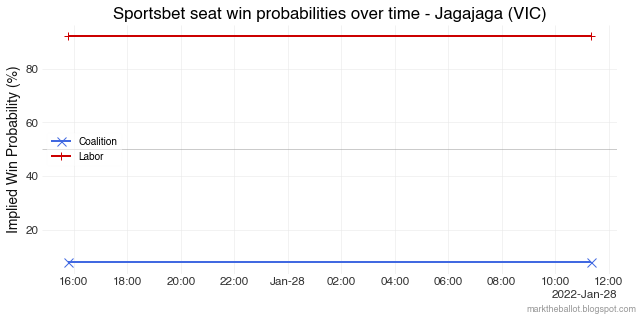

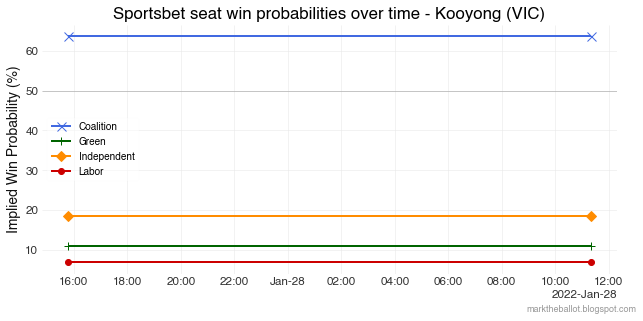

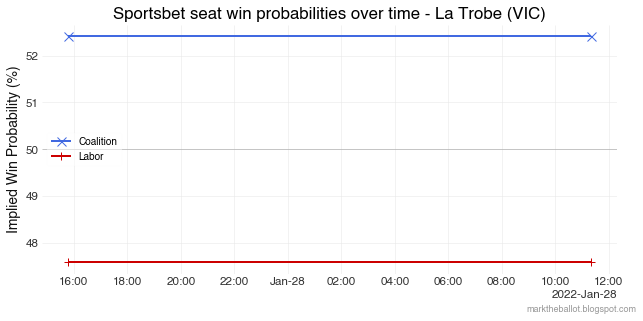

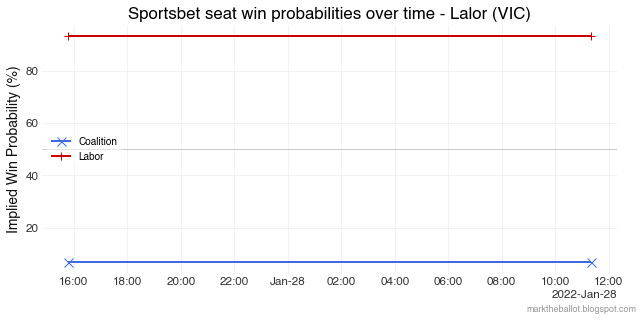

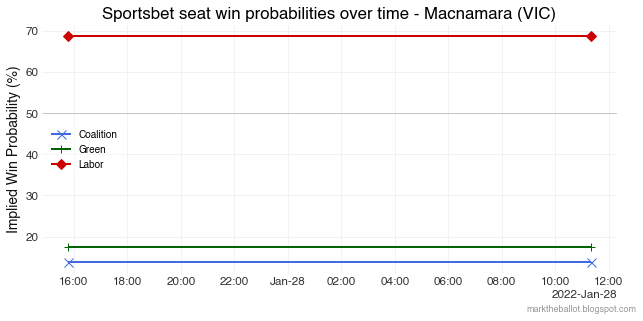

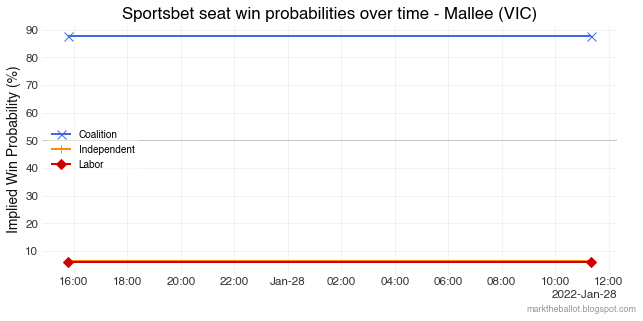

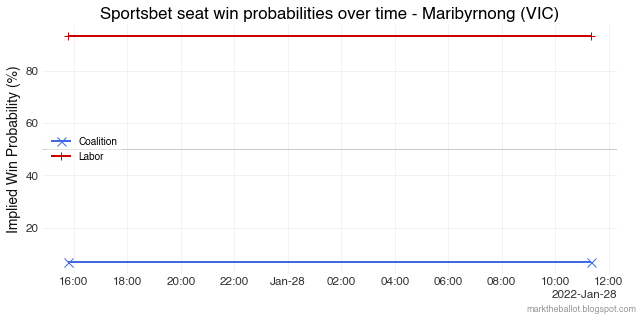

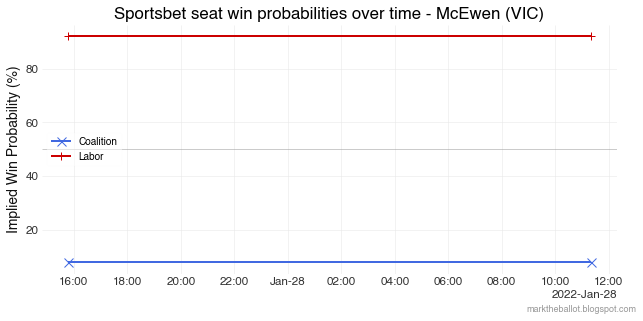

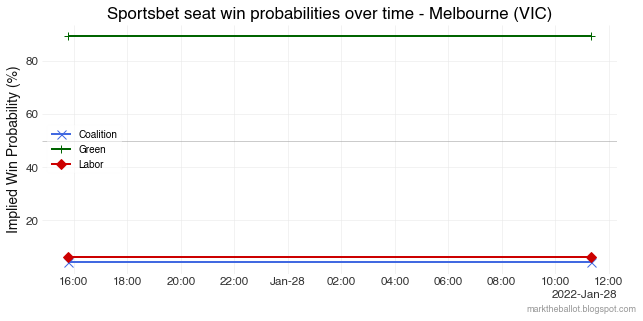

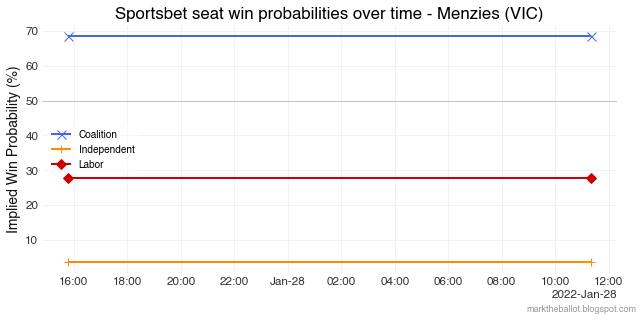

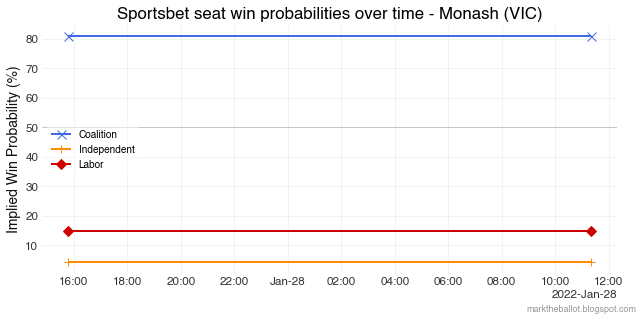

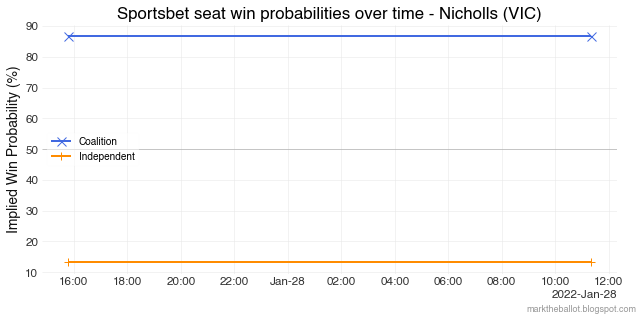

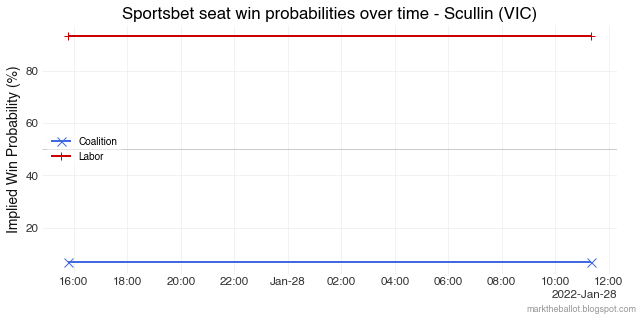

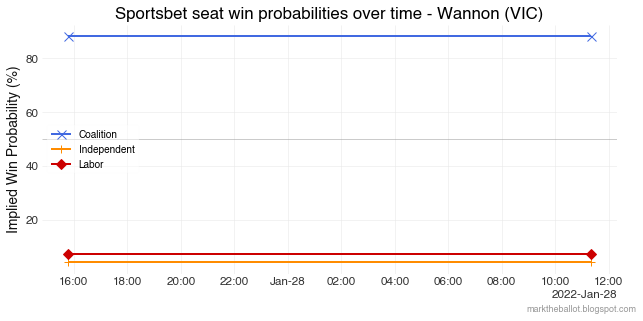

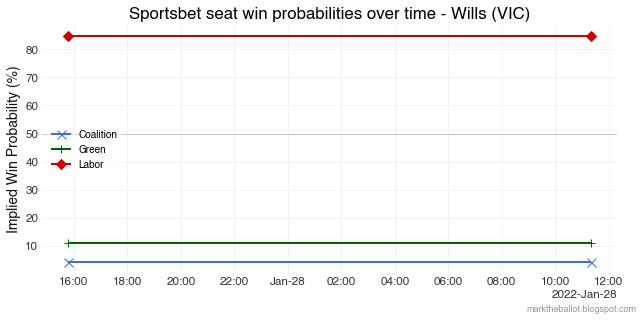

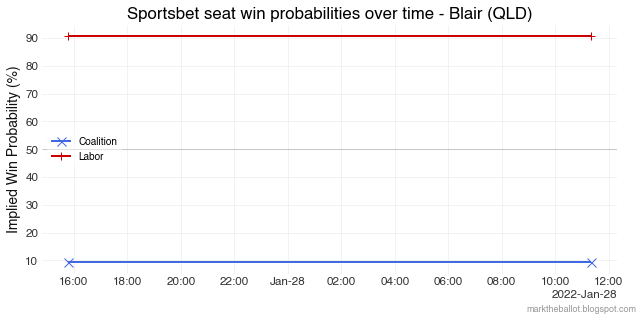

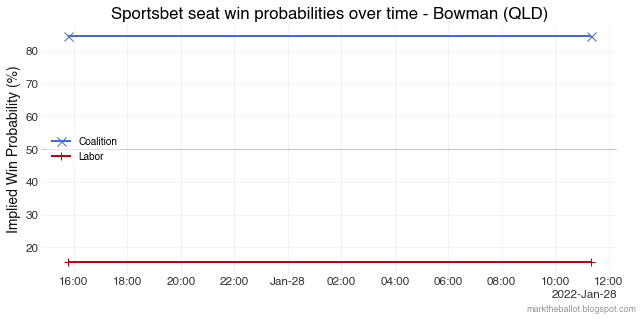

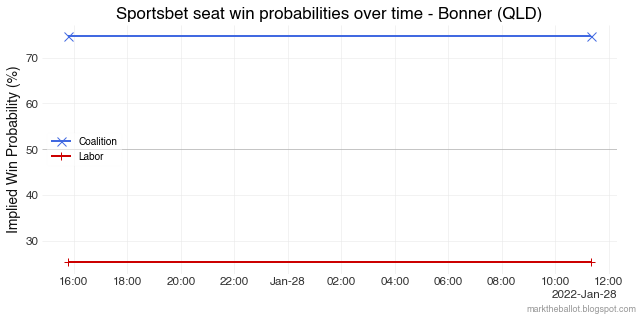

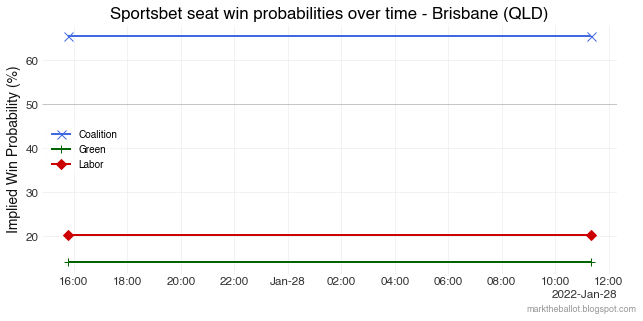

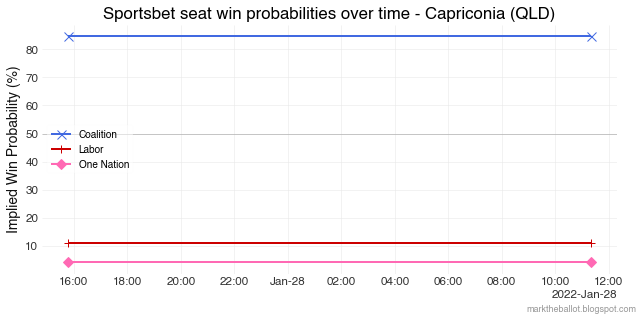

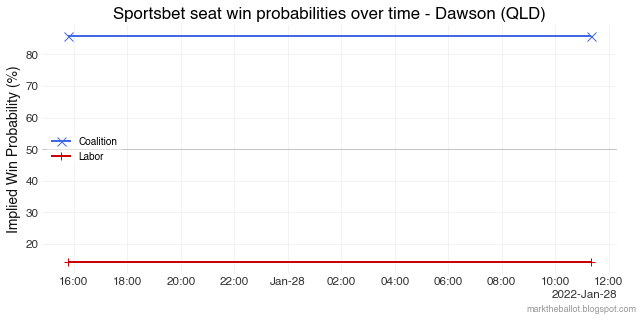

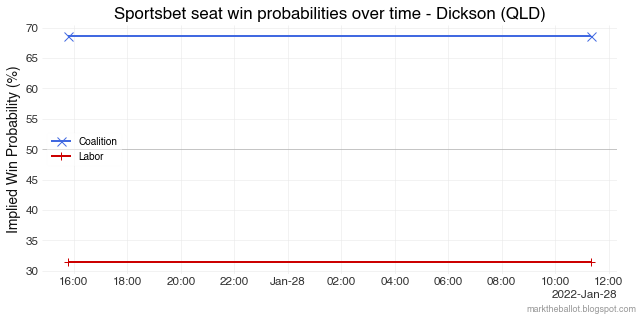

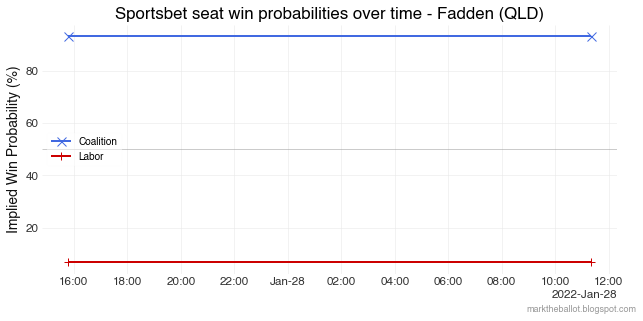

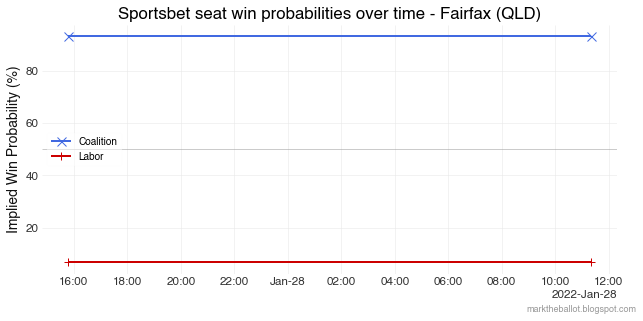

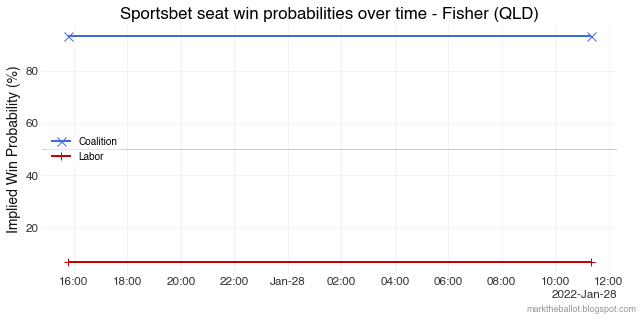

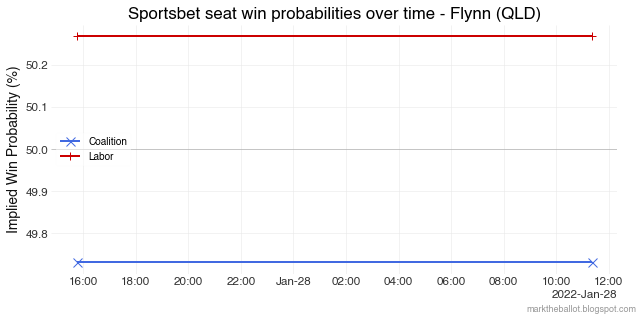

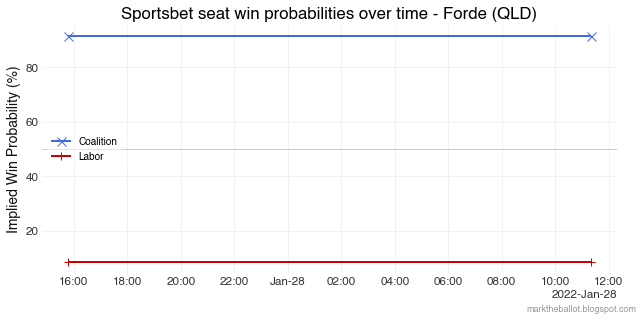

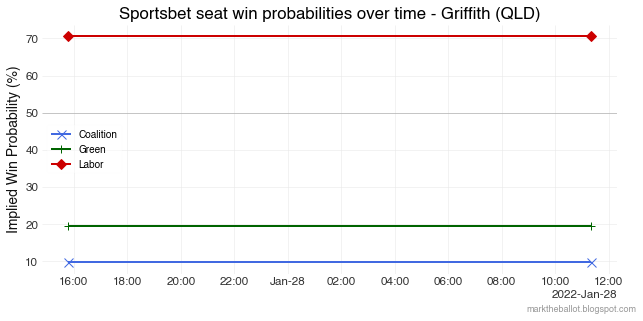

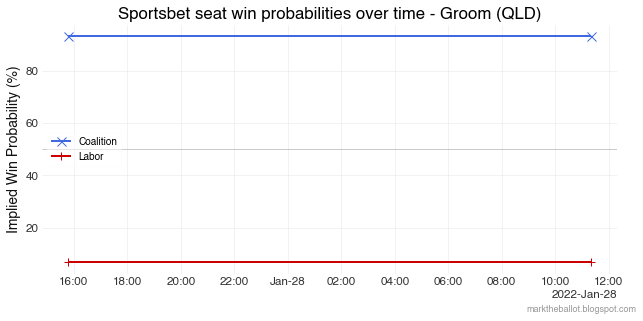

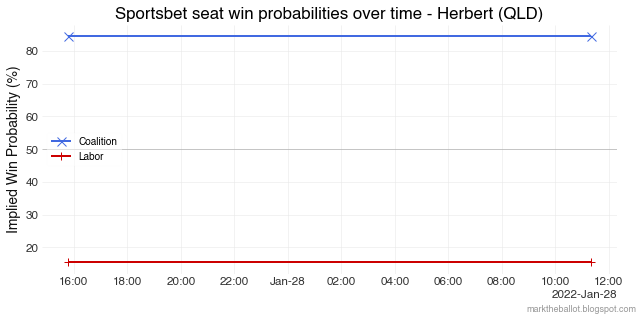

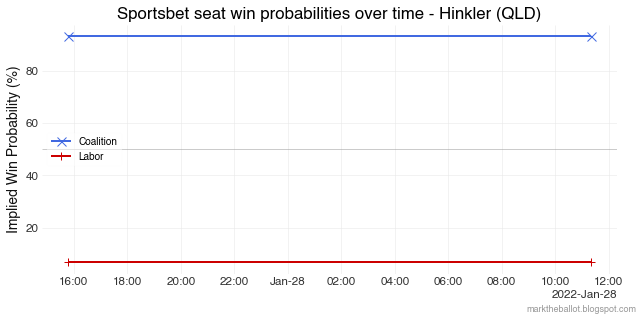

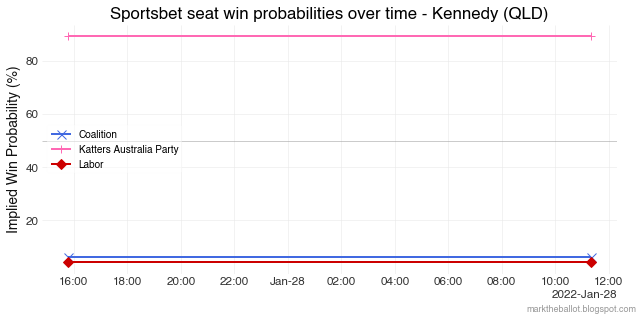

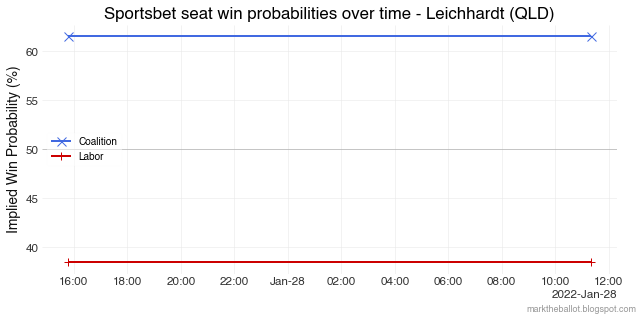

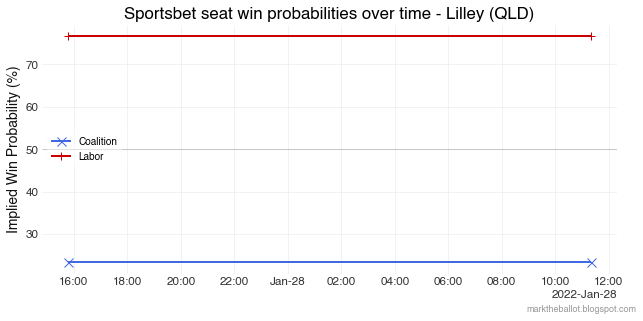

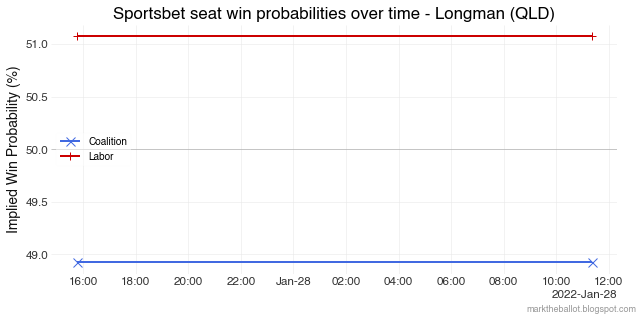

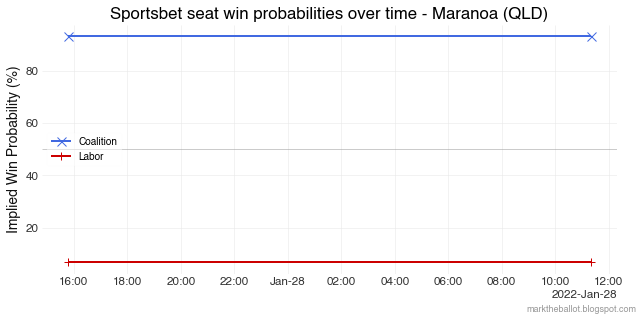

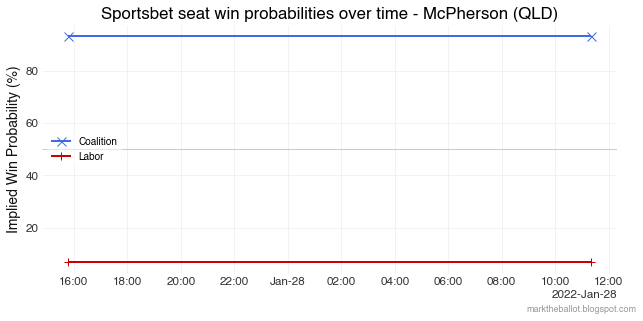

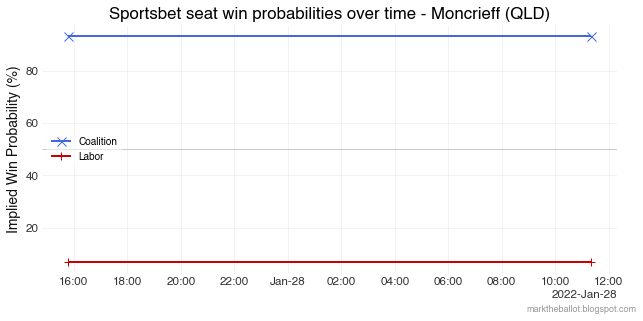

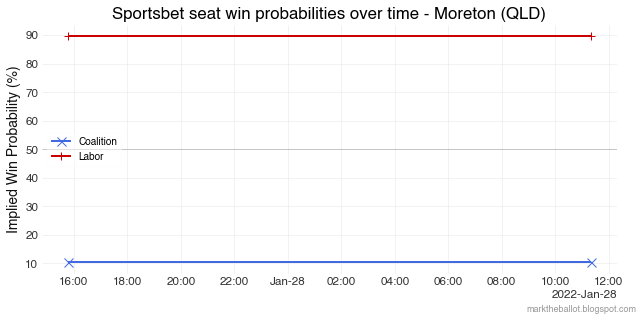

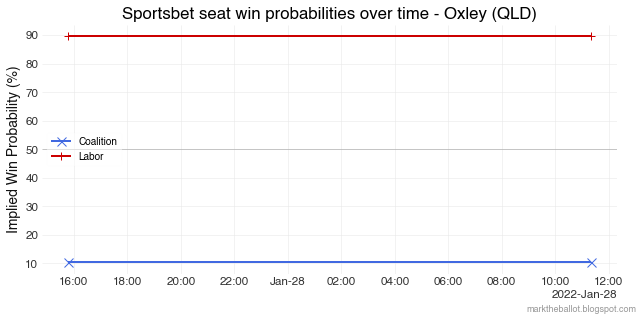

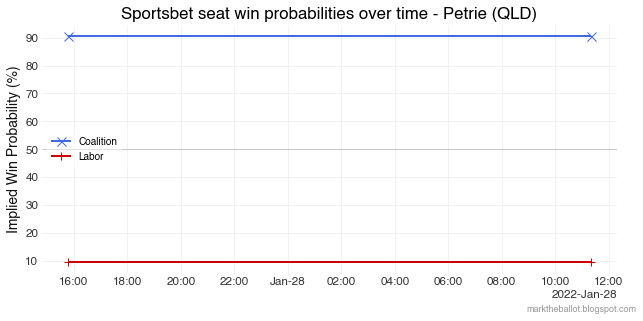

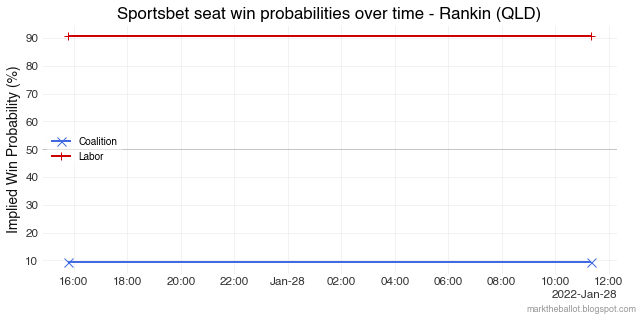

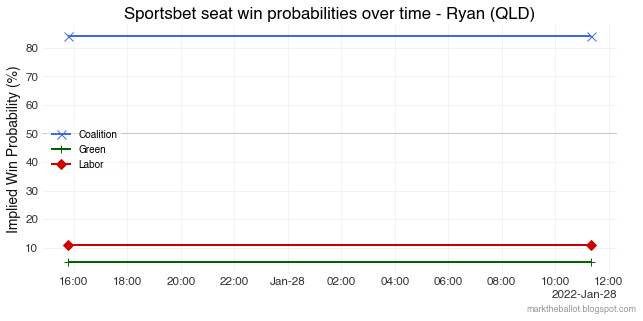

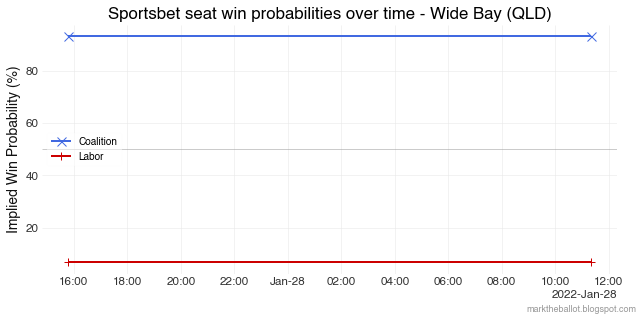

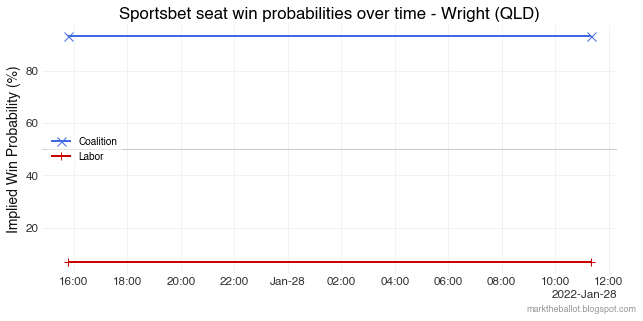

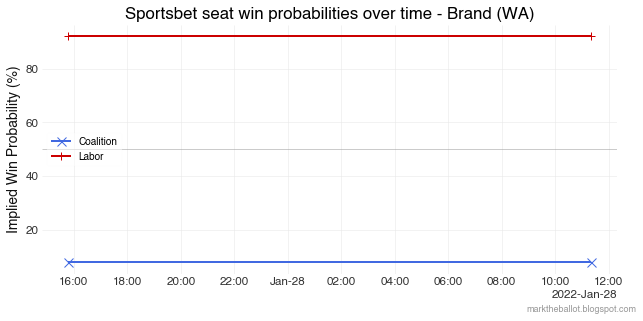

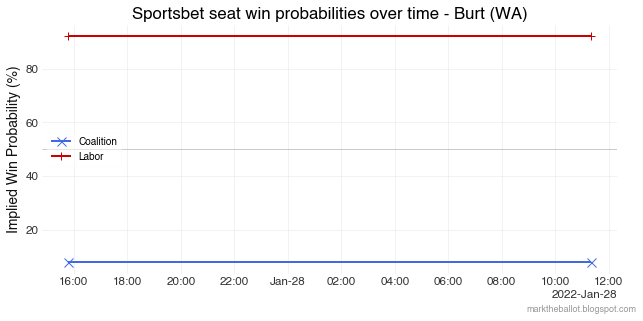

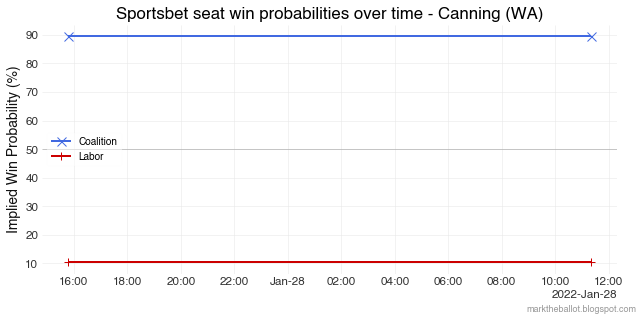

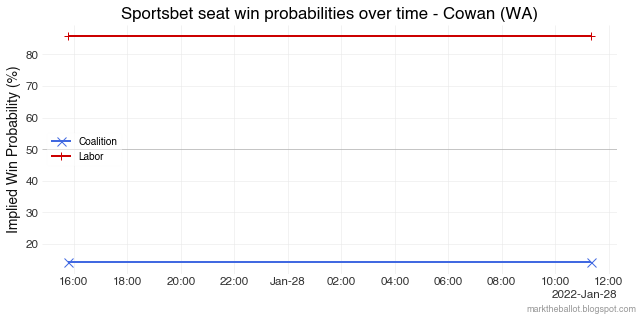

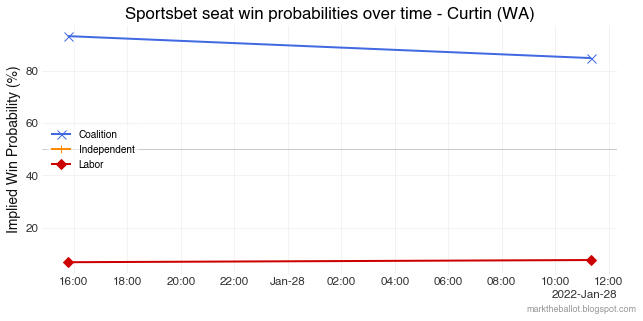

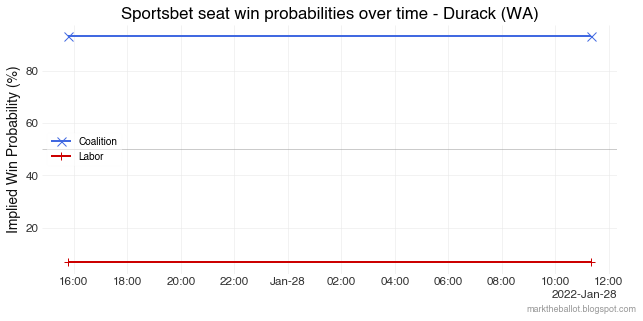

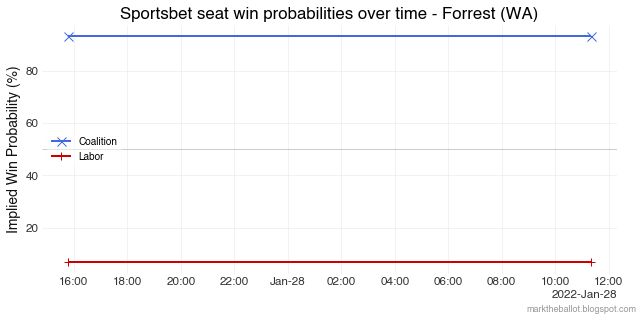

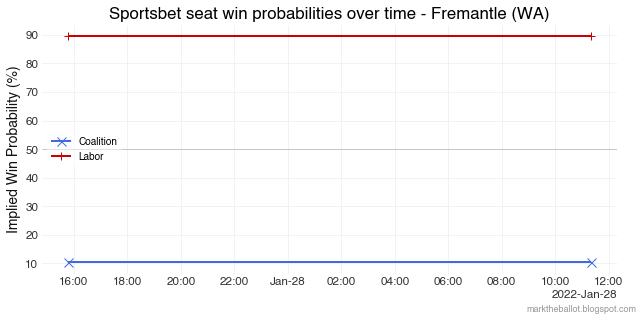

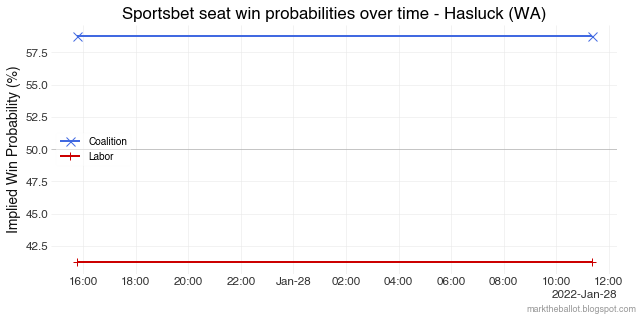

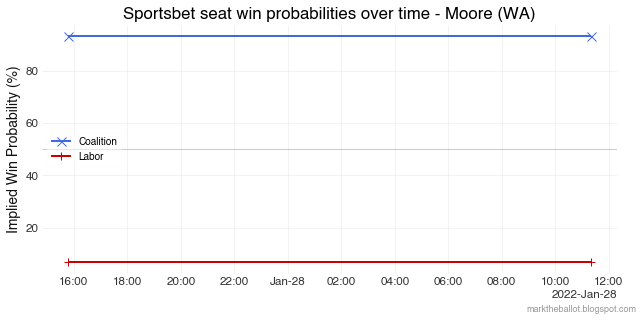

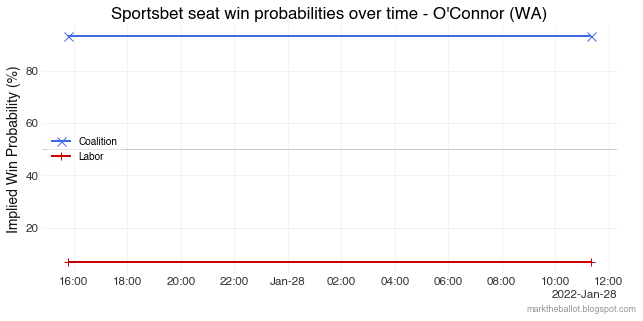

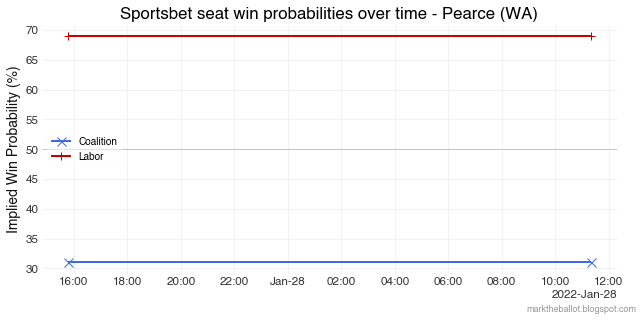

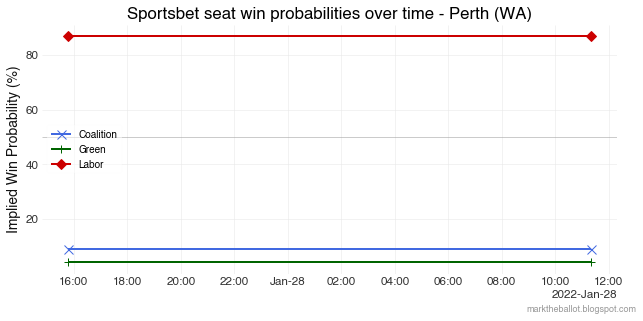

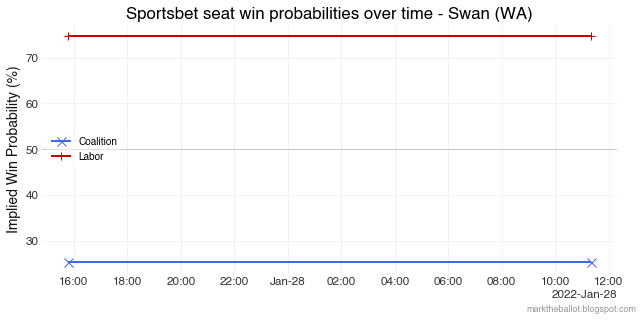

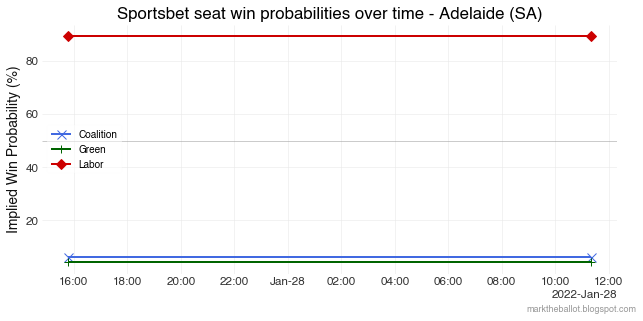

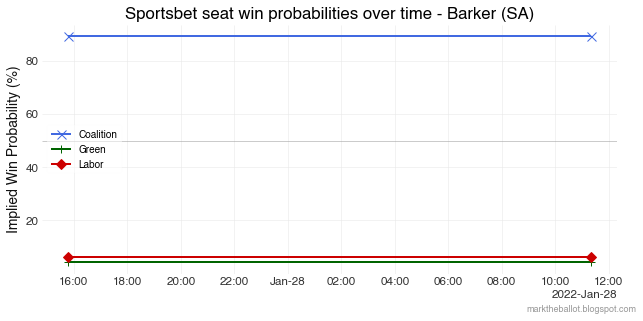

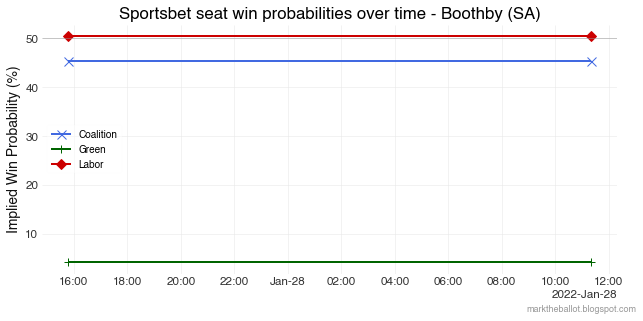

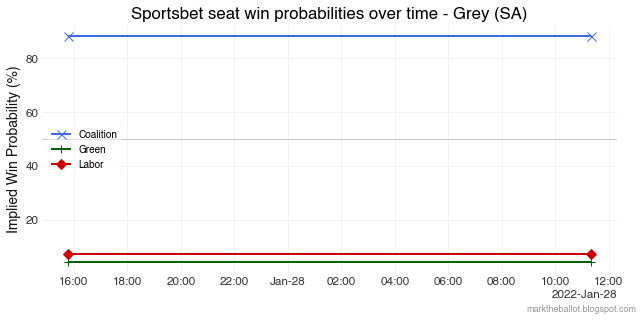

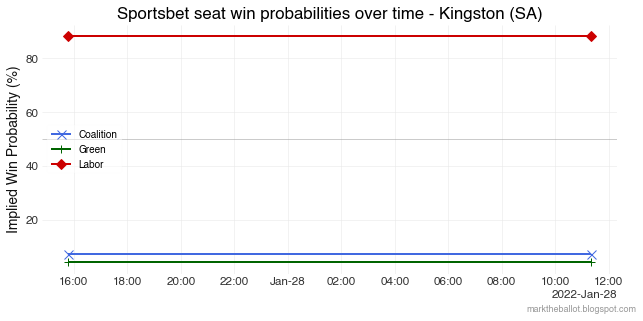

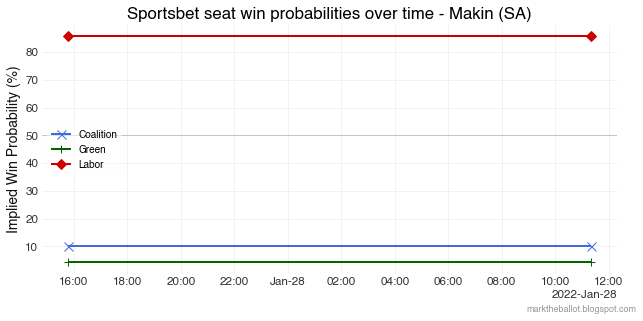

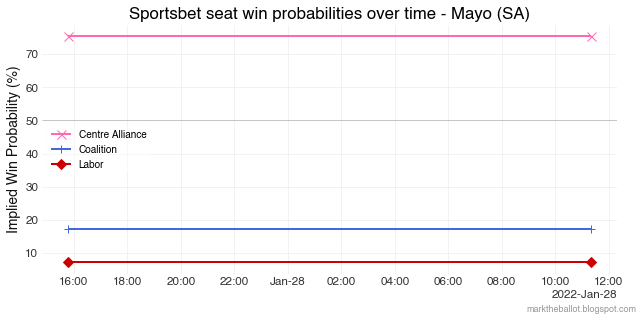

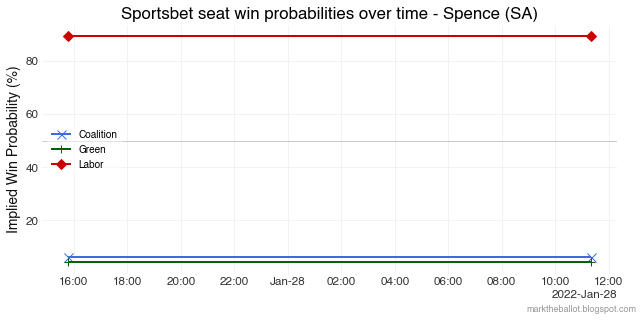

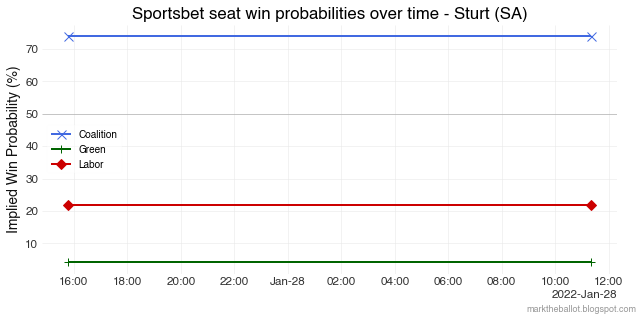

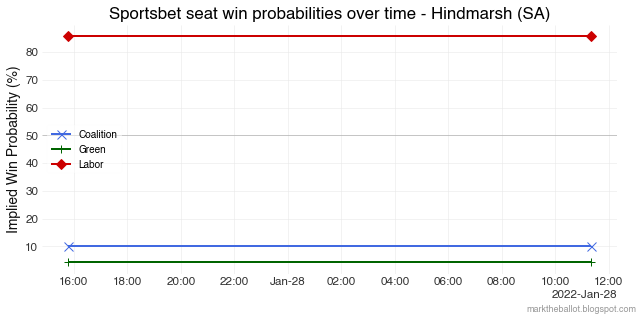

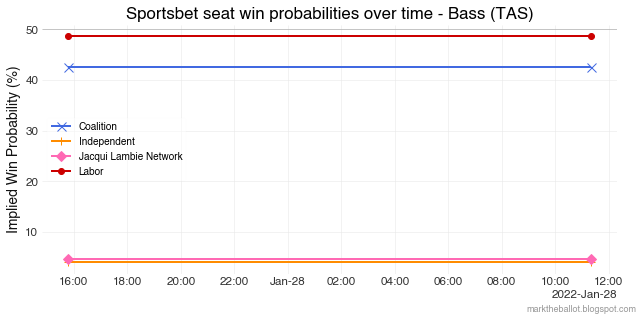

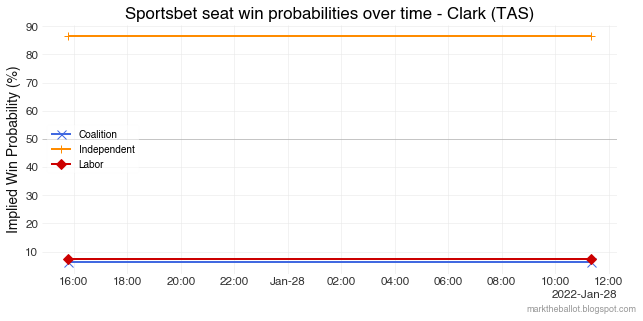

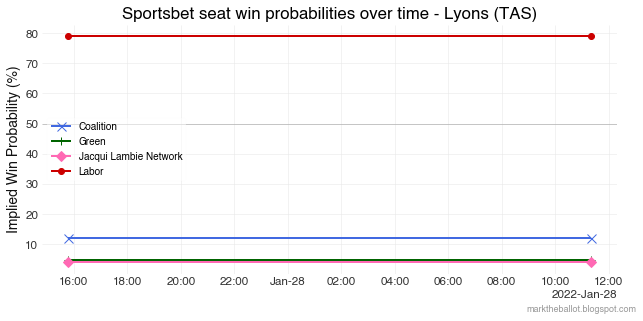

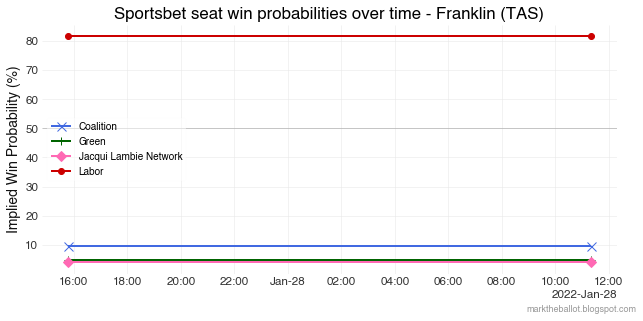

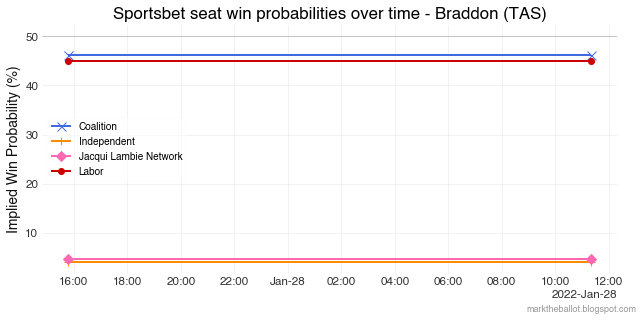

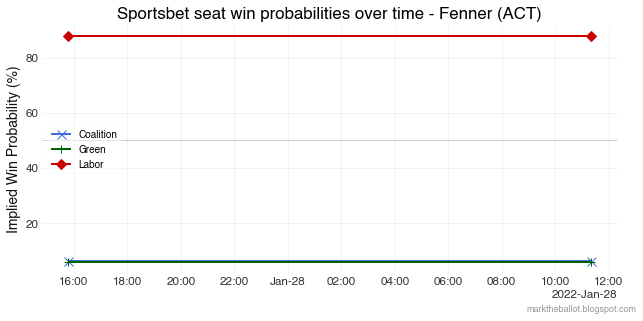

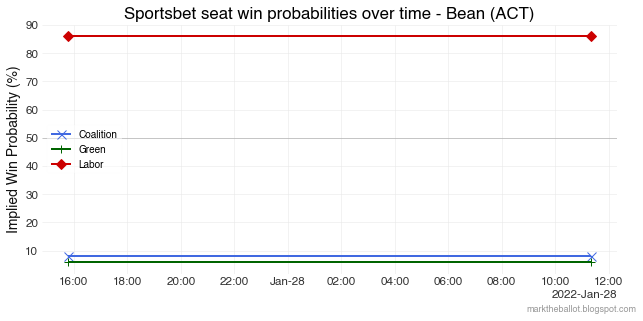

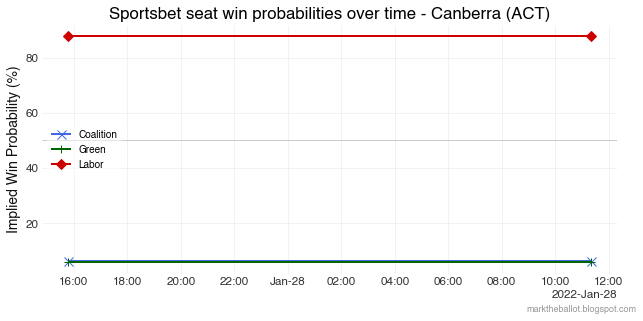

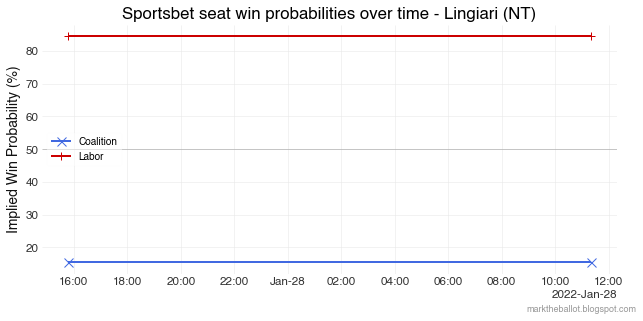

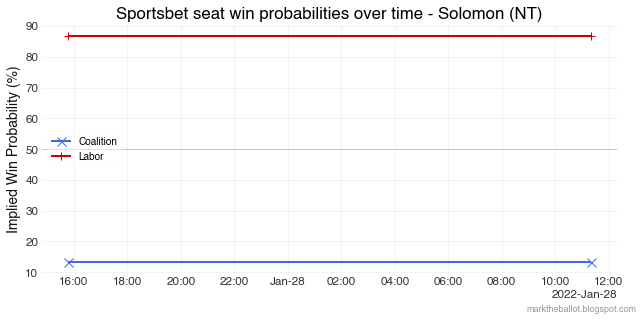

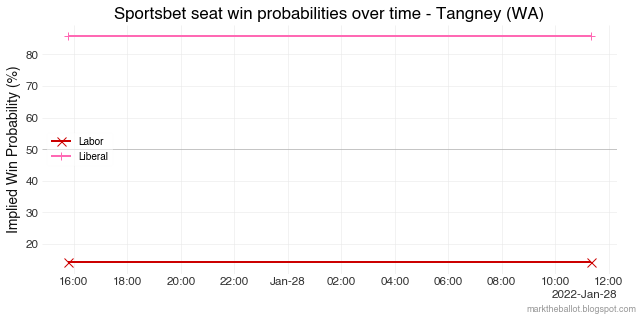

In [5]:
best_dict = {}
for seat in df.seat.unique():
    best_dict[seat] = plot_seat(df, seat)

In [6]:
# identiy the close contest seats
best_series = pd.Series(best_dict).sort_values(ascending=True)
best_series[best_series <= 60]#.index

Braddon (TAS)      46.198825
Flinders (VIC)     46.385775
Casey (VIC)        48.501793
Bass (TAS)         48.648649
Deakin (VIC)       50.268817
Gilmore (NSW)      50.268817
Flynn (QLD)        50.268817
Boothby (SA)       50.485437
Longman (QLD)      51.075269
Reid (NSW)         51.742627
La Trobe (VIC)     52.419355
Lindsay (NSW)      52.419355
Robertson (NSW)    52.702703
Hunter (NSW)       53.333333
Dobell (NSW)       54.054054
Higgins (VIC)      57.434588
Goldstein (VIC)    58.728482
Hasluck (WA)       58.746736
Wentworth (NSW)    58.970693
dtype: float64

In [7]:
best_series[best_series <= 60].index

Index(['Braddon (TAS)', 'Flinders (VIC)', 'Casey (VIC)', 'Bass (TAS)',
       'Deakin (VIC)', 'Gilmore (NSW)', 'Flynn (QLD)', 'Boothby (SA)',
       'Longman (QLD)', 'Reid (NSW)', 'La Trobe (VIC)', 'Lindsay (NSW)',
       'Robertson (NSW)', 'Hunter (NSW)', 'Dobell (NSW)', 'Higgins (VIC)',
       'Goldstein (VIC)', 'Hasluck (WA)', 'Wentworth (NSW)'],
      dtype='object')